# Maestría en Analítica de Datos
## Proyecto Final Machine Learning 2025-10

### ETL y EDA

In [1]:
# Importar librerías necesarias
from datasets import load_dataset
import pandas as pd

# Cargar el dataset desde Huggin Face
dataset = load_dataset("akshatmehta98/amazon_reviews")

# Mostrando estructura del dataset
dataset

DatasetDict({
    train: Dataset({
        features: ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Summary', 'text', 'labels', 'sentiment_code', 'input_ids', 'attention_mask'],
        num_rows: 303316
    })
    test: Dataset({
        features: ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Summary', 'text', 'labels', 'sentiment_code', 'input_ids', 'attention_mask'],
        num_rows: 116661
    })
})

In [2]:
# Convertimos a DataFrame para visualizar mejor
df_train = dataset['train'].to_pandas()
df_test = dataset['test'].to_pandas()  

# Veamos las primeras filas del train
df_train.head(10)

,HelpfulnessNumerator,HelpfulnessDenominator,Summary,text,labels,sentiment_code,input_ids,attention_mask
0,0,0,Great find!,these candies are very hard to find in the sin...,positive,2,[ 0 6097 831 34204 621 4552 7...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
1,0,0,very tasty - and healthy,im on the healthy nutrition and fitness kick t...,positive,2,[ 0 566 98 70 87349 150017 ...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
2,0,0,I liked the old man design better :),i dont normally add content to amazon because ...,positive,2,[ 0 17 13319 3638 538 15190 10...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
3,0,0,Good gluten free cookie!,good tasting cookie will satisfy your sweet to...,positive,2,[ 0 4127 3251 1916 9332 1221 40407 ...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
4,88,95,Organic but BPA in the lid!,our baby really loves to eat these and they co...,negative,0,[ 0 2446 15546 6183 5161 7 ...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
5,0,0,a must for gin and tonic,i once tried q tonic for my gin and tonic now ...,positive,2,[ 0 17 24145 37842 8096 47 6...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
6,1,2,Delicious!,glad i ordered these they are really yummy i g...,positive,2,[ 0 9525 17 12989 297 6097 1...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
7,0,0,Great tasting tea at best price,my family is big on tea drinking and cant sett...,positive,2,[ 0 759 14449 83 6957 98 26...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
8,6,9,Tasted bad. Tossed most in the trash,i lived in the islands for 5 years and i know ...,negative,0,[ 0 17 158930 23 70 90695 ...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
9,0,0,Awesome service and great products,we sent this product as a gift to my husbands ...,positive,2,[ 0 642 9325 903 12996 237 ...,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...


In [3]:
#Revisión general del train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303316 entries, 0 to 303315
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   HelpfulnessNumerator    303316 non-null  int64 
 1   HelpfulnessDenominator  303316 non-null  int64 
 2   Summary                 303316 non-null  object
 3   text                    303316 non-null  object
 4   labels                  303316 non-null  object
 5   sentiment_code          303316 non-null  int64 
 6   input_ids               303316 non-null  object
 7   attention_mask          303316 non-null  object
dtypes: int64(3), object(5)
memory usage: 18.5+ MB


In [4]:
df_train.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,sentiment_code
count,303316.000000,303316.000000,303316.000000
mean,1.844644,2.815661,0.929773
std,6.636582,7.804405,0.833000
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000
75%,2.000000,3.000000,2.000000
max,844.000000,923.000000,2.000000


In [5]:
# Distribución de la variable Objetivo en el train
df_train["labels"].value_counts(normalize=True)

negative    0.384523
positive    0.314296
neutral     0.301181
Name: labels, dtype: float64

In [6]:
# Calculemos la longitud de las reseñas en PALABRAS
df_train["length_words"] = df_train["text"].apply(lambda x: len(str(x).split()))

# Calculemos la longitud de las reseñas en CARACTERES
df_train["length_chars"] = df_train["text"].apply(lambda x: len(str(x)))

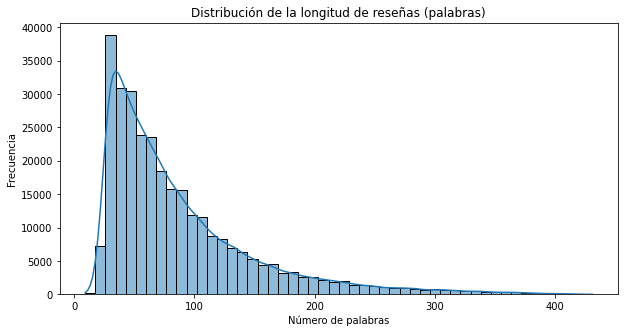

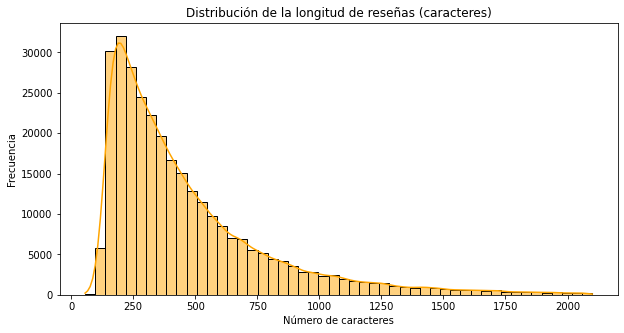

In [7]:
# Librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de longitud en palabras
plt.figure(figsize=(10,5))
sns.histplot(df_train['length_words'], bins=50, kde=True)
plt.title('Distribución de la longitud de reseñas (palabras)')
plt.xlabel('Número de palabras')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de longitud en caracteres
plt.figure(figsize=(10,5))
sns.histplot(df_train['length_chars'], bins=50, kde=True, color='orange')
plt.title('Distribución de la longitud de reseñas (caracteres)')
plt.xlabel('Número de caracteres')
plt.ylabel('Frecuencia')
plt.show()

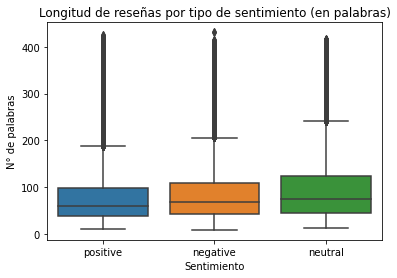

In [8]:
# Relacionamos longitud con el sentimiento
sns.boxplot(data=df_train, x='labels', y='length_words')
plt.title('Longitud de reseñas por tipo de sentimiento (en palabras)')
plt.xlabel('Sentimiento')
plt.ylabel('N° de palabras')
plt.show()

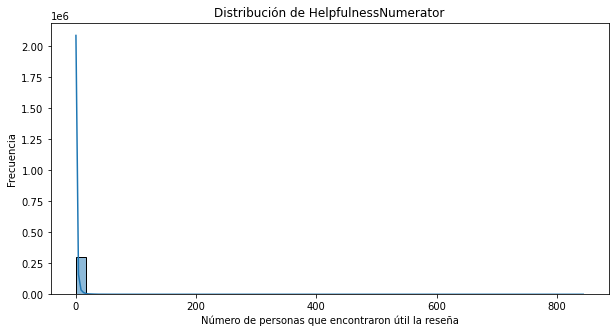

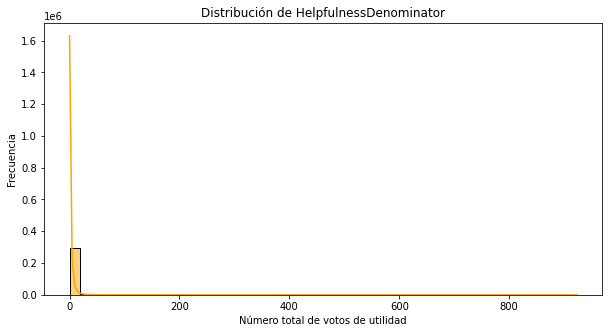

In [9]:
# Distribución de las variables HelpfulnessNumerator y HelpfulnessDenominator

# HelpfulnessNumerator
plt.figure(figsize=(10,5))
sns.histplot(df_train['HelpfulnessNumerator'], bins=50, kde=True)
plt.title('Distribución de HelpfulnessNumerator')
plt.xlabel('Número de personas que encontraron útil la reseña')
plt.ylabel('Frecuencia')
plt.show()

# HelpfulnessDenominator
plt.figure(figsize=(10,5))
sns.histplot(df_train['HelpfulnessDenominator'], bins=50, kde=True, color='orange')
plt.title('Distribución de HelpfulnessDenominator')
plt.xlabel('Número total de votos de utilidad')
plt.ylabel('Frecuencia')
plt.show()

In [10]:
# Agregamos una columna de ratio de utilidad
# Esto normaliza un poco el análisis
df_train['helpfulness_ratio'] = df_train['HelpfulnessNumerator'] / (df_train['HelpfulnessDenominator'] + 1)

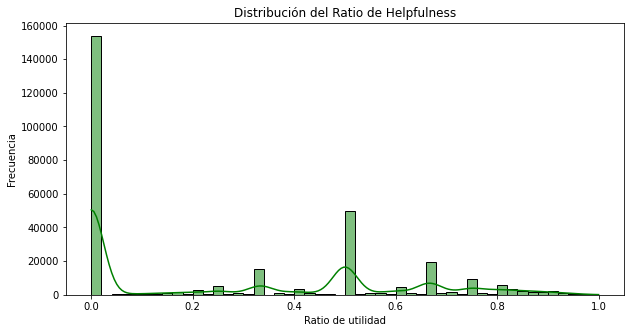

In [11]:
#Visualizamos la distribución del ratio de utilidad
plt.figure(figsize=(10,5))
sns.histplot(df_train['helpfulness_ratio'], bins=50, kde=True, color='green')
plt.title('Distribución del Ratio de Helpfulness')
plt.xlabel('Ratio de utilidad')
plt.ylabel('Frecuencia')
plt.show()

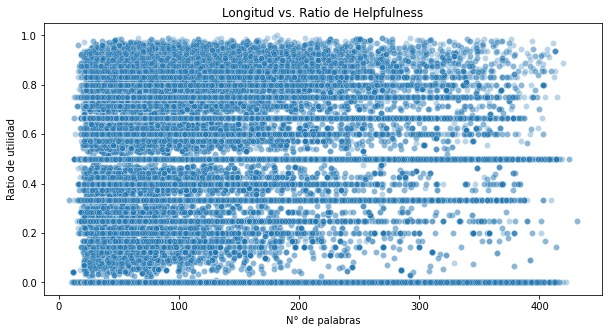

In [12]:
# Veamos una posible relación entre longitud y utilidad
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_train, x='length_words', y='helpfulness_ratio', alpha=0.3)
plt.title('Longitud vs. Ratio de Helpfulness')
plt.xlabel('N° de palabras')
plt.ylabel('Ratio de utilidad')
plt.show()

In [13]:
# Vamos a limpiar el texto para una visualización a través de WordCloud
# Para empezar, importaremos las librerías necesarias
import nltk
import re
import string

# Descargar stopwords solo una vez
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gustavo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Realizaremos una función para limpiar el texto
def limpiar_texto(texto):
    # Pasar a minúsculas
    texto = texto.lower()
    # Eliminar números
    texto = re.sub(r'\d+', '', texto)
    # Eliminar puntuación
    texto = texto.translate(str.maketrans('', '', string.punctuation))
    # Eliminar stopwords
    texto = " ".join([word for word in texto.split() if word not in stop_words])
    return texto

In [15]:
# Creamos una nueva columna en el DataFrame con el texto limpio (Solo para visualización)
df_train['clean_text'] = df_train['text'].apply(limpiar_texto)

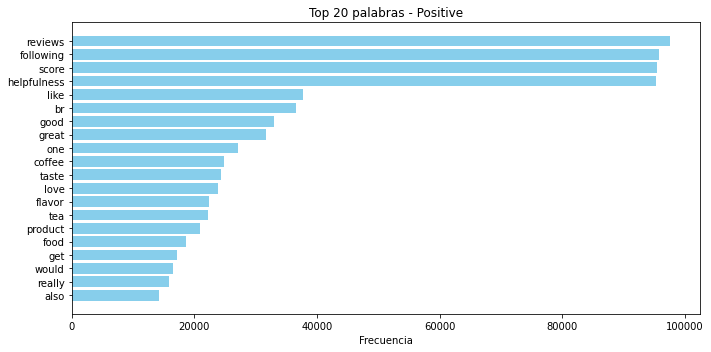

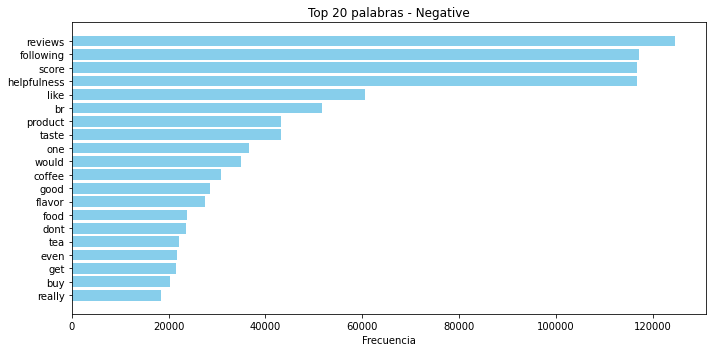

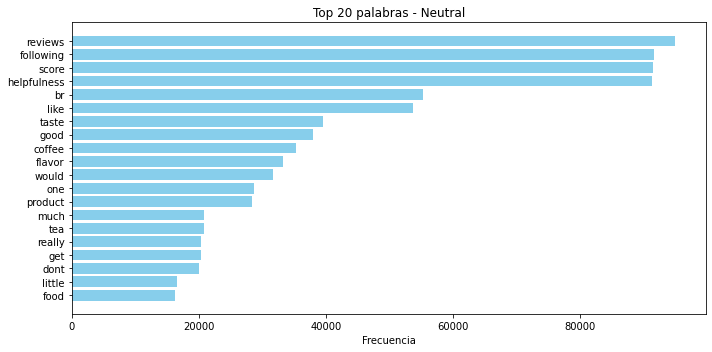

In [16]:
# Con el texto limpio, procedemos a crear una nube de palabras con wordcloud, por sentimiento
from collections import Counter
import matplotlib.pyplot as plt

def top_palabras_por_clase(df, clase, n=20):
    subset = df[df['labels'] == clase]
    texto = " ".join(subset['clean_text'].dropna())
    palabras = texto.split()
    top = Counter(palabras).most_common(n)

    palabras, freqs = zip(*top)
    plt.figure(figsize=(10, 5))
    plt.barh(palabras[::-1], freqs[::-1], color='skyblue')
    plt.title(f'Top {n} palabras - {clase.capitalize()}')
    plt.xlabel("Frecuencia")
    plt.tight_layout()
    plt.show()

for clase in ['positive', 'negative', 'neutral']:
    top_palabras_por_clase(df_train, clase)

In [17]:
# Vamos a calcular TF-IDF para visualizar la importancia de las palabras por clase
#libreria necesaria
from sklearn.feature_extraction.text import TfidfVectorizer

# Agrupar el texto por clase
textos_por_clase = df_train.groupby("labels")["clean_text"].apply(lambda x: " ".join(x.dropna()))

# Creamos el vectorizador TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Aplicamos a los textos agrupados por clase
tfidf_matrix = vectorizer.fit_transform(textos_por_clase)

# Obtenemos nombres de las palabras
palabras = vectorizer.get_feature_names_out()

# Creamos un DataFrame TF-IDF con clases como índice y palabras como columnas
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), index=textos_por_clase.index, columns=palabras)

In [18]:
# Creamos una función para visualizar el top de palabras por clase
def mostrar_top_tfidf(clase, top_n=20):
    serie = df_tfidf.loc[clase].sort_values(ascending=False)[:top_n]
    plt.figure(figsize=(10,5))
    plt.barh(serie.index[::-1], serie.values[::-1], color='tomato')
    plt.title(f'Top {top_n} palabras con mayor TF-IDF en clase: {clase}')
    plt.xlabel('Peso TF-IDF')
    plt.tight_layout()
    plt.show()

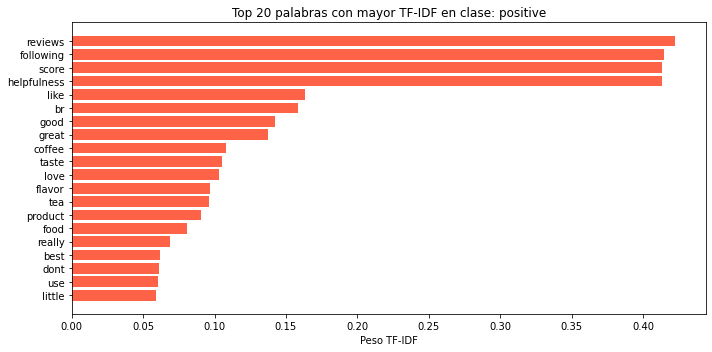

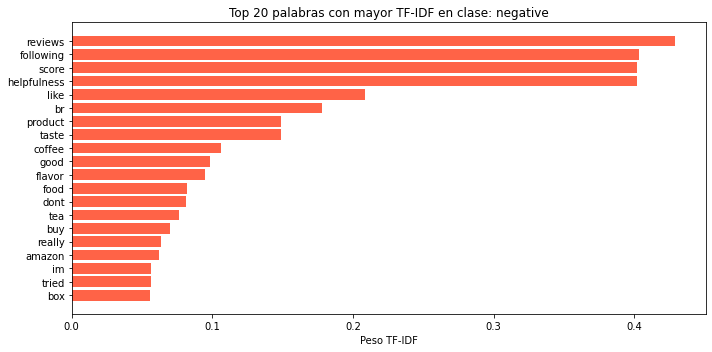

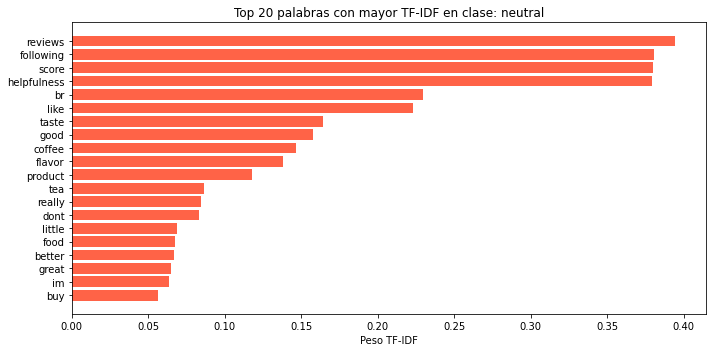

In [19]:
# Mostramos el top de palabras por clase
for clase in ['positive', 'negative', 'neutral']:
    mostrar_top_tfidf(clase)

In [20]:
# Distribución de la variable Objetivo en el test
df_test["labels"].value_counts(normalize=True)

negative    0.386659
positive    0.314115
neutral     0.299226
Name: labels, dtype: float64

In [21]:
# Sacamos los datos de validación de los datos de ntrenamiento
from sklearn.model_selection import train_test_split

# Dividir df_train en train y valid (80/20)
df_train_split, df_valid = train_test_split(df_train, test_size=0.2, random_state=42, stratify=df_train['sentiment_code'])

print("Train split:", df_train_split.shape)
print("Valid split:", df_valid.shape)

Train split: (242652, 12)
Valid split: (60664, 12)


### Tokenización y Embeddings

In [ ]:
# Verificamos que el equipo (MAC) este usando la GPU
import torch

device = 'mps' if torch.backends.mps.is_available() else 'cpu'
print(f"✅ Dispositivo seleccionado: {device}")

✅ Dispositivo seleccionado: mps


In [23]:
import os
os.environ["USE_TF"] = "0"
# Usaremos un modelo preentrenado basado en transformers para generar los embeddings
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2',device=device)

In [24]:
# Generar embeddings
X_train = model.encode(df_train_split['text'].tolist(), show_progress_bar=True)
X_valid = model.encode(df_valid['text'].tolist(), show_progress_bar=True)
X_test  = model.encode(df_test['text'].tolist(),  show_progress_bar=True)

# Etiquetas
y_train = df_train_split['sentiment_code'].values
y_valid = df_valid['sentiment_code'].values
y_test  = df_test['sentiment_code'].values

# Confirmar formas
print("✅ X_train:", X_train.shape)
print("✅ X_valid:", X_valid.shape)
print("✅ X_test: ", X_test.shape)

Batches:   0%|          | 0/7583 [00:00<?, ?it/s]

Batches:   0%|          | 0/1896 [00:00<?, ?it/s]

Batches:   0%|          | 0/3646 [00:00<?, ?it/s]

✅ X_train: (242652, 768)
✅ X_valid: (60664, 768)
✅ X_test:  (116661, 768)


In [25]:
# Guardamos los embeddings y etiquetas en archivos .npy
import numpy as np

# Guardar embeddings
np.save("X_train_embeddings.npy", X_train)
np.save("X_valid_embeddings.npy", X_valid)
np.save("X_test_embeddings.npy", X_test)

# Guardar etiquetas
np.save("y_train.npy", y_train)
np.save("y_valid.npy", y_valid)
np.save("y_test.npy", y_test)

print("✅ Archivos guardados correctamente.")

✅ Archivos guardados correctamente.


In [ ]:
# Para cargar los embeddings y etiquetas en otro script, usar:
X_train = np.load("X_train_embeddings.npy")
X_valid = np.load("X_valid_embeddings.npy")
X_test  = np.load("X_test_embeddings.npy")

y_train = np.load("y_train.npy")
y_valid = np.load("y_valid.npy")
y_test  = np.load("y_test.npy")